In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

PATHS = {
    'train': './data/train.csv',
    'test': './data/test.csv',
    'sample_submission': './data/sample_submission.csv',
    'prediction': lambda model_name: f'./prediction/{model_name}_{time.strftime("%Y%m%d%H%M%S")}.csv'
}

In [209]:
# load train data
train = pd.read_csv(PATHS['train'], index_col='id')
test = pd.read_csv(PATHS['test'], index_col='id')
sample_submission = pd.read_csv(PATHS['sample_submission'])
print(train.shape)
train.head()

(20758, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [210]:
# Print kinds of column value
for column in train.columns:
    if train[column].dtype == np.int64 or train[column].dtype == np.float64:
        continue
    kinds = train[column].unique()
    print(f'{column}: {kinds}')
    print()

Gender: ['Male' 'Female']

family_history_with_overweight: ['yes' 'no']

FAVC: ['yes' 'no']

CAEC: ['Sometimes' 'Frequently' 'no' 'Always']

SMOKE: ['no' 'yes']

SCC: ['no' 'yes']

CALC: ['Sometimes' 'no' 'Frequently']

MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']

NObeyesdad: ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']



In [211]:
# check missing values
train.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [212]:
# Gender: ['Male' 'Female']
# family_history_with_overweight: ['yes' 'no']
# FAVC: ['yes' 'no']
# CAEC: ['Sometimes' 'Frequently' 'no' 'Always']
# SMOKE: ['no' 'yes']
# SCC: ['no' 'yes']
# CALC: ['Sometimes' 'no' 'Frequently']
# MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
# NObeyesdad: ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight' 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I' 'Obesity_Type_I']

# replace string to int
GENDER_MAP = {'Male':0,'Female':1}
FAMILY_HISTORY_WITH_OVERWEIGHT_MAP = {'no':0,'yes':1}
FAVC_MAP = {'no':0,'yes':1}
CAEC_MAP = {'no':0,'Sometimes':1,'Frequently':2,'Always':3}
SMOKE_MAP = {'no':0,'yes':1}
SCC_MAP = {'no':0,'yes':1}
CALC_MAP = {'no':0,'Sometimes':1,'Frequently':2,'Always':3}
MTRANS_MAP = {'Public_Transportation':0,'Automobile':1,'Walking':2,'Motorbike':3,'Bike':4}
N_OBEYESDAD_MAP = {'Insufficient_Weight':0,'Normal_Weight':1,'Overweight_Level_I':2,'Overweight_Level_II':3,'Obesity_Type_I':4,'Obesity_Type_II':5,'Obesity_Type_III':6}
N_OBEYESDAD_MAP_INV = {v: k for k, v in N_OBEYESDAD_MAP.items()}

# apply each map
MAPPING = {
    'Gender': GENDER_MAP,
    'family_history_with_overweight': FAMILY_HISTORY_WITH_OVERWEIGHT_MAP,
    'FAVC': FAVC_MAP,
    'CAEC': CAEC_MAP,
    'SMOKE': SMOKE_MAP,
    'SCC': SCC_MAP,
    'CALC': CALC_MAP,
    'MTRANS': MTRANS_MAP,
    'NObeyesdad': N_OBEYESDAD_MAP
}

train = train.replace(MAPPING)
test = test.replace(MAPPING)

DROP_FEATURES = ['FAVC', 'SCC', 'SMOKE']

In [213]:
TARGET = 'NObeyesdad'
# split data into features and target
X = train.drop(TARGET, axis=1)
y = train[TARGET]

Epoch 1/100


2024-02-07 09:00:32.795137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


519/519 [==============================] - ETA: 0s - loss: 9.0437 - mean_squared_error: 9.0437

2024-02-07 09:00:37.211385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


519/519 [==============================] - 5s 9ms/step - loss: 9.0437 - mean_squared_error: 9.0437 - val_loss: 7.0203 - val_mean_squared_error: 7.0203
Epoch 2/100
519/519 [==============================] - 4s 8ms/step - loss: 5.4798 - mean_squared_error: 5.4798 - val_loss: 4.3163 - val_mean_squared_error: 4.3163
Epoch 3/100
519/519 [==============================] - 4s 8ms/step - loss: 3.3661 - mean_squared_error: 3.3661 - val_loss: 2.6266 - val_mean_squared_error: 2.6266
Epoch 4/100
519/519 [==============================] - 4s 8ms/step - loss: 2.0741 - mean_squared_error: 2.0741 - val_loss: 1.6142 - val_mean_squared_error: 1.6142
Epoch 5/100
519/519 [==============================] - 4s 8ms/step - loss: 1.2937 - mean_squared_error: 1.2937 - val_loss: 0.9968 - val_mean_squared_error: 0.9968
Epoch 6/100
519/519 [==============================] - 4s 8ms/step - loss: 0.8185 - mean_squared_error: 0.8185 - val_loss: 0.6223 - val_mean_squared_error: 0.6223
Epoch 7/100
519/519 [=============

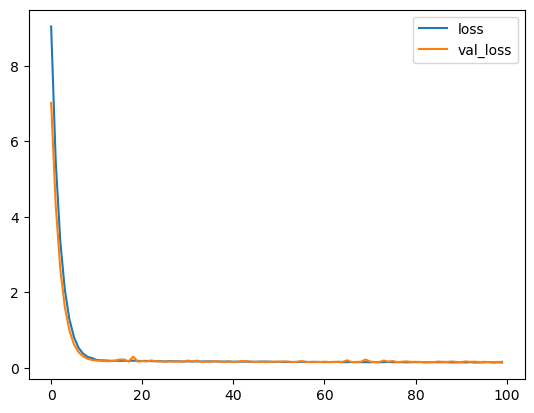

INFO:tensorflow:Assets written to: ./model/nn_model/assets
 63/519 [==>...........................] - ETA: 1s

2024-02-07 09:07:18.445872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


130/130 [==============================] - 0s 2ms/step


In [214]:
# split data into train and validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

UPDATE_MODEL = True

if UPDATE_MODEL:
    # 目的変数が連続とみなせるので、マルチクラス分類ではなく、回帰モデルとして解いてみる
    # とりあえずtfでDNNを作ってみる
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.layers.experimental import preprocessing

    # モデルの定義
    # 64-64relu-32relu-11softmax
    model = keras.Sequential([
        preprocessing.Normalization(),
        # layers.Dense(64, activation='relu'),
        # layers.Dense(64, activation='relu'),
        # layers.Dense(1)
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(7, activation='softmax'),
        layers.Dense(1)
    ])

    # モデルのコンパイル
    model.compile(
        optimizer='adam',
        loss='mean_squared_error',
        metrics=['mean_squared_error']
    )

    # モデルの学習
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        batch_size=32,
        epochs=100
    )

    # 学習曲線の可視化
    history_df = pd.DataFrame(history.history)
    history_df.loc[:, ['loss', 'val_loss']].plot()
    plt.show()

    # save model
    model.save('./model/nn_model')

else:
    # load model
    model = keras.models.load_model('./model/nn_model')

# predict
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

In [215]:

# yは0~6の整数値を取るので、四捨五入して整数値に変換
y_val_pred = np.round(y_val_pred).astype(int)
y_train_pred = np.round(y_train_pred).astype(int)

In [216]:

# evaluate
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
print(f'train_acc: {train_acc}')
print(f'val_acc: {val_acc}')

train_acc: 0.8656509695290858
val_acc: 0.850674373795761


In [217]:
# predict test data
test.head()
test_pred = model.predict(test)

# 0~6の整数値に変換
test_pred = np.round(test_pred).astype(int)

# flatten
test_pred = test_pred.flatten()

# save the result
submission = sample_submission.copy()
# apply inverse mapping
test_pred = pd.Series(test_pred).map(N_OBEYESDAD_MAP_INV)
submission[TARGET] = test_pred
submission.to_csv(PATHS['prediction']('random_forest'), index=False)

# feature importance
# feature_importance = model.feature_importances_
# feature_importance = pd.Series(feature_importance, index=X.columns)
# feature_importance = feature_importance.sort_values(ascending=False)
# feature_importance.plot(kind='bar')
# plt.show()

# check the result
submission.head()

433/433 [==============================] - 1s 2ms/step


,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
